# Lab 5

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/taraskiba/geog-510/blob/lab5/book/labs/lab_05.ipynb)

## Exercise 1: Calculating Distances with Functions

- Define a function `calculate_distance` that takes two geographic coordinates (latitude and longitude) and returns the distance between them using the Haversine formula.
- Use this function to calculate the distance between multiple pairs of coordinates.

In [177]:
from math import radians, cos, sin, atan2, sqrt
def haversine(lat1, long1, lat2, long2):
    R = 6371.0 # radius of the Earth in km
    dlat = radians(lat2 - lat1)
    dlong = radians(long2 - long1)
    a = sin(dlat/2) * sin(dlat/2) + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlong/2) * sin(dlong/2)
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

lengthA = haversine(36.12, -86.67, 33.94, -118.40)
lengthB = haversine(33.94, -118.40, 38.91, -77.04)
lengthC = haversine(38.91, -77.04, 40.71, -74.01)
print(f"Distance: {lengthA:.2f} km") # .2f sets number of sig figs
print(f"Distance: {lengthB:.2f} km")
print(f"Distance: {lengthC:.2f} km")

Distance: 2886.44 km
Distance: 3709.60 km
Distance: 327.14 km


## Exercise 2: Batch Distance Calculation

- Create a function `batch_distance_calculation` that accepts a list of coordinate pairs and returns a list of distances between consecutive pairs.
- Test the function with a list of coordinates representing several cities.

In [178]:
def batch_distance_calculation(locations):
    for i, (lat1, long1, lat2, long2) in enumerate(locations):
        distance = haversine(lat1, long1, lat2, long2)
        print(f"Distance {i+1}: {distance:.2f} km")

locations = [(36.12, -86.67, 33.94, -118.40),
             (33.94, -118.40, 38.91, -77.04),
             (38.91, -77.04, 40.71, -74.01),
            (40.71, -74.01, 34.05, -118.25)]

location_distances = batch_distance_calculation(locations)

Distance 1: 2886.44 km
Distance 2: 3709.60 km
Distance 3: 327.14 km
Distance 4: 3936.06 km


## Exercise 3: Creating and Using a Point Class

- Define a `Point` class to represent a geographic point with attributes `latitude`, `longitude`, and `name`.
- Add a method `distance_to` that calculates the distance from one point to another.
- Instantiate several `Point` objects and calculate the distance between them.

In [179]:
class Point:
    def __init__(self, latitude, longitude, name = None):
        self.latitude = latitude
        self.longitude = longitude
        self.name = name    

    def distance_to(self, other):
        return haversine(self.latitude, self.longitude, other.latitude, other.longitude)    
    

point1 = Point(36.12, -86.67, "Nashville")
point2 = Point(33.94, -118.40, "Los Angeles")
point3 = Point(38.91, -77.04, "Washington")
point4 = Point(40.71, -74.01, "New York")

print(f"Distance from {point1.name} to {point2.name} is {point1.distance_to(point2):.2f} km")   
print(f"Distance from {point2.name} to {point3.name} is {point2.distance_to(point3):.2f} km")
print(f"Distance from {point3.name} to {point4.name} is {point3.distance_to(point4):.2f} km")
print(f"Distance from {point4.name} to {point1.name} is {point4.distance_to(point1):.2f} km")


Distance from Nashville to Los Angeles is 2886.44 km
Distance from Los Angeles to Washington is 3709.60 km
Distance from Washington to New York is 327.14 km
Distance from New York to Nashville is 1213.80 km


## Exercise 4: Reading and Writing Files

- Write a function `read_coordinates` that reads a file containing a list of coordinates (latitude, longitude) and returns them as a list of tuples.
- Write another function `write_coordinates` that takes a list of coordinates and writes them to a new file.
- Ensure that both functions handle exceptions, such as missing files or improperly formatted data.

In [180]:
# sample file to read in
sample_data = """35.6895,139.6917
34.0522,-118.2437
51.5074,-0.1278
-33.8688,151.2093
48.8566,2.3522"""

output_file = "coordinates.txt"

try:
    with open(output_file, "w") as file:
        file.write(sample_data)
    print(f"Sample file '{output_file}' has been created successfully.")
except Exception as e:
    print(f"An error occurred while creating the file: {e}")


Sample file 'coordinates.txt' has been created successfully.


In [181]:
# read in coordinates
def read_coordinates_tuple(filename):
    coordinates = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                # Strip whitespace and split the line
                parts = line.strip().split(',')
                if len(parts) == 2:
                    try:
                        lat = float(parts[0])
                        lon = float(parts[1])
                        coordinates.append((lat, lon))
                    except ValueError:
                        print(f"Skipping invalid line: {line.strip()}")
                else:
                    print(f"Skipping line with incorrect format: {line.strip()}")
    except FileNotFoundError:
        print(f"File '{filename}' not found.")
    except IOError:
        print(f"Error reading file '{filename}'.")
    
    return coordinates

# Example usage:
filename = "coordinates.txt"
coord_list = read_coordinates_tuple(filename)
print(coord_list)


[(35.6895, 139.6917), (34.0522, -118.2437), (51.5074, -0.1278), (-33.8688, 151.2093), (48.8566, 2.3522)]


In [182]:
def write_coordinates(output_file):
    try:
        with open(output_file, "w") as file:
            file.write(sample_data)
        print(f"Sample file '{output_file}' has been created successfully.")
    except Exception as e:
        print(f"An error occurred while creating the file: {e}")

output_file = "coordinates.txt"

## Exercise 5: Processing Coordinates from a File

- Create a function that reads coordinates from a file and uses the `Point` class to create `Point` objects.
- Calculate the distance between each consecutive pair of points and write the results to a new file.
- Ensure the function handles file-related exceptions and gracefully handles improperly formatted lines.

In [183]:
def read_coordinates(input_file):
    coordinates = []
    try:
        with open(input_file, "r") as file:
            for line in file:
                line = line.strip()
                latitude, longitude = line.split(",")
                point = f"POINT({longitude} {latitude})"
                coordinates.append(point)
        return (coordinates)
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

input_file = "coordinates.txt"

coordinate_locations = read_coordinates(input_file)

In [184]:
from shapely import wkt

In [185]:
#calculate distance between two points
def distance_calculations(coordinate_locations):
    distances = []
    try:
        for i in range(len(coordinate_locations)-1):
            point1 = wkt.loads(coordinate_locations[i])
            point2 = wkt.loads(coordinate_locations[i+1])

            lat1 = float(point1.y)
            lon1 = float(point1.x)
            lat2 = float(point2.y)
            lon2 = float(point2.x)

            distance = haversine(lat1, lon1, lat2, lon2)
            distances.append(distance)
        print(f"Successfully calculated distances.")
        return distances
    except Exception as e:
        print(f"An error occurred while reading the file: {e}")

coordinate_locations = read_coordinates(input_file)
distances = distance_calculations(coordinate_locations)
print(distances)

Successfully calculated distances.
[8815.473355809401, 8755.602341157259, 16993.933459795906, 16960.497376398747]


## Exercise 6: Exception Handling in Data Processing

- Modify the `batch_distance_calculation` function to handle exceptions that might occur during the calculation, such as invalid coordinates.
- Ensure the function skips invalid data and continues processing the remaining data.

In [186]:
# batch distance calculation with data handling
def batch_distance_calculation(locations):
    for i, location in enumerate(locations):
        try:
            lat1, long1, lat2, long2 = location
            distance = haversine(lat1, long1, lat2, long2)
            print(f"Distance {i+1}: {distance:.2f} km")
        except (TypeError, ValueError):
            print(f"Skipping invalid line: {i} & {i+1}")
        except Exception as e:
            print(f"Unexpected error processing line {i+1}: {str(e)}")


locations = [(36.12, -86.67, 33.94, -118.40),
             (33.94, -118.40, 38.91, -77.04),
             (38.91, -77.04, 40.71, -74.01),
             "invalid",
            (40.71, -74.01, 34.05, -118.25)]

location_distances = batch_distance_calculation(locations)

Distance 1: 2886.44 km
Distance 2: 3709.60 km
Distance 3: 327.14 km
Skipping invalid line: 3 & 4
Distance 5: 3936.06 km


## Exercise 7: NumPy Array Operations and Geospatial Coordinates

In this exercise, you will work with NumPy arrays representing geospatial coordinates (latitude and longitude) and perform basic array operations.

1. Create a 2D NumPy array containing the latitude and longitude of the following cities: Tokyo (35.6895, 139.6917), New York (40.7128, -74.0060), London (51.5074, -0.1278), and Paris (48.8566, 2.3522).
2. Convert the latitude and longitude values from degrees to radians using np.radians().
3. Calculate the element-wise difference between Tokyo and the other cities' latitude and longitude in radians.

In [187]:
import numpy as np

In [188]:
simple_array = np.array([[35.6895, 139.6917],
                        [40.7128, -74.0060],
                        [51.5074, -0.1278],
                        [48.8566, 2.3522]])
print(f"Lat, Long coordinates: \n {simple_array} \n")

simple_array_radians = np.radians(simple_array)
print(f"Radians: \n {simple_array_radians}")

Lat, Long coordinates: 
 [[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]
 [ 4.885660e+01  2.352200e+00]] 

Radians: 
 [[ 6.22899283e-01  2.43808010e+00]
 [ 7.10572408e-01 -1.29164837e+00]
 [ 8.98973719e-01 -2.23053078e-03]
 [ 8.52708531e-01  4.10536347e-02]]


## Exercise 8: Pandas DataFrame Operations with Geospatial Data

In this exercise, you'll use Pandas to load and manipulate a dataset containing city population data, and then calculate and visualize statistics.

1. Load the world cities dataset from this URL using Pandas: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Display the first 5 rows and check for missing values.
3. Filter the dataset to only include cities with a population greater than 1 million.
4. Group the cities by their country and calculate the total population for each country.
5. Sort the cities by population in descending order and display the top 10 cities.

In [189]:
import pandas as pd

In [190]:
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"

world_cities = pd.read_csv(url)
print(world_cities.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [191]:
large_population = world_cities[world_cities['population'] > 1_000_000]

In [192]:
country_population = world_cities.groupby('country')['population'].sum()
print(country_population)

country
AFG     4931702
AGO     6821544
ALB      895350
ALD       10682
AND       53998
         ...   
WSM       61916
YEM     3759000
ZAF    13373789
ZMB     2326947
ZWE     2611745
Name: population, Length: 200, dtype: int64


In [193]:
country_pop_sorted = country_population.sort_values(ascending=False)
print(country_pop_sorted[:10])

country
CHN    217132049
USA    156465416
IND    154810226
BRA     80794236
JPN     65779390
RUS     47306359
MEX     44222027
IDN     27339158
PAK     26416033
NGA     24852791
Name: population, dtype: int64


## Exercise 9: Creating and Manipulating GeoDataFrames with GeoPandas

This exercise focuses on creating and manipulating GeoDataFrames, performing spatial operations, and visualizing the data.

1. Load the New York City building dataset from the GeoJSON file using GeoPandas: https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson
2. Create a plot of the building footprints and color them based on the building height (use the `height_MS` column).
3. Create an interactive map of the building footprints and color them based on the building height (use the `height_MS` column).
4. Calculate the average building height (use the `height_MS` column).
5. Select buildings with a height greater than the average height.
6. Save the GeoDataFrame to a new GeoJSON file.

In [194]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [195]:
nyc_url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
nyc_data = gpd.read_file(nyc_url)

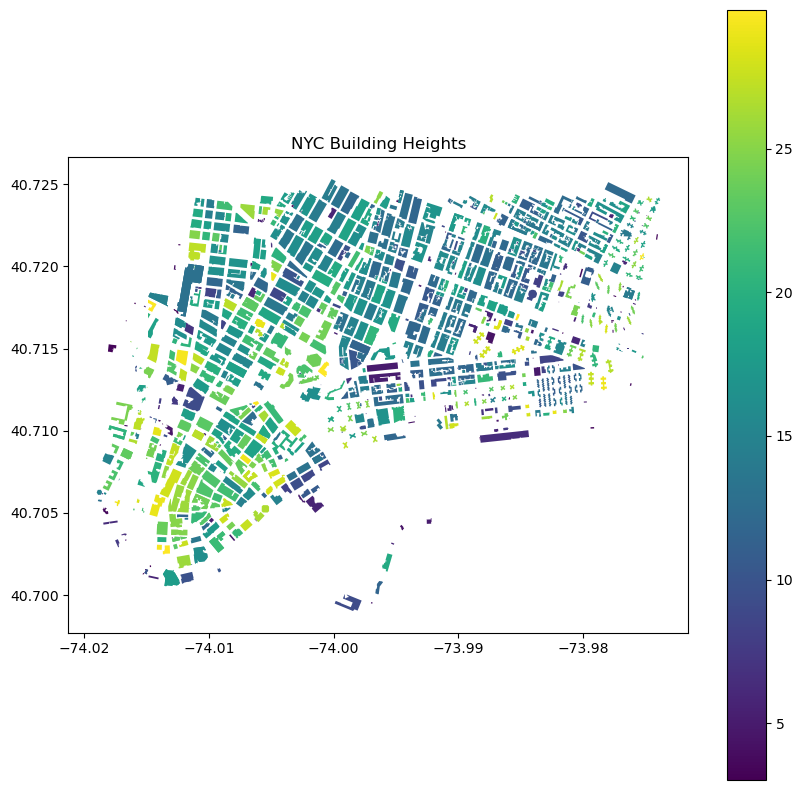

In [196]:
nyc_data.plot("height_MS", legend = True, figsize = (10,10))
plt.title("NYC Building Heights")
plt.show()

## Exercise 10: Combining NumPy, Pandas, and GeoPandas

This exercise requires you to combine the power of NumPy, Pandas, and GeoPandas to analyze and visualize spatial data.

1. Use Pandas to load the world cities dataset from this URL: https://github.com/opengeos/datasets/releases/download/world/world_cities.csv
2. Filter the dataset to include only cities with latitude values between -40 and 60 (i.e., cities located in the Northern Hemisphere or near the equator).
3. Create a GeoDataFrame from the filtered dataset by converting the latitude and longitude into geometries.
4. Reproject the GeoDataFrame to the Mercator projection (EPSG:3857).
5. Calculate the distance (in meters) between each city and the city of Paris.
6. Plot the cities on a world map, coloring the points by their distance from Paris.

In [197]:
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
cities_of_the_world = pd.read_csv(url)
print(cities_of_the_world.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [198]:
condition1 = cities_of_the_world['latitude'] > -40
condition2 = cities_of_the_world['latitude'] < 60

selected_northern_cities = cities_of_the_world[condition1 & condition2]
print(selected_northern_cities.head())

   id         name country  latitude  longitude  population
0   1        Bombo     UGA    0.5833    32.5333       75000
1   2  Fort Portal     UGA    0.6710    30.2750       42670
2   3      Potenza     ITA   40.6420    15.7990       69060
3   4   Campobasso     ITA   41.5630    14.6560       50762
4   5        Aosta     ITA   45.7370     7.3150       34062


In [199]:
selected_cities_df = pd.DataFrame(selected_northern_cities)
selected_cities_gdf = gpd.GeoDataFrame(selected_cities_df, geometry=gpd.points_from_xy(selected_cities_df.longitude, selected_cities_df.latitude))

In [200]:
selected_cities_gdf.crs = "EPSG:3857"


In [ ]:
selected_cities_gdf = selected_cities_gdf.set_index("name")
selected_cities_gdf["centroid"] = selected_cities_gdf["geometry"].centroid
paris_centroid = selected_cities_gdf.loc["Paris", "centroid"]


In [203]:
selected_cities_gdf["distance_to_Paris"] = selected_cities_gdf["centroid"].distance(paris_centroid)
selected_cities_gdf[["centroid", "distance_to_Paris"]]

,centroid,distance_to_Paris
name,,
Bombo,POINT (32.533 0.6),56.950183
Fort Portal,POINT (30.275 0.7),55.709612
Potenza,POINT (15.799 40.642),15.778768
Campobasso,POINT (14.656 41.563),14.324519
Aosta,POINT (7.315 45.737),5.883188
...,...,...
Rio de Janeiro,POINT (-43.225 -22.925),85.027136
Sao Paulo,POINT (-46.625 -23.559),87.420565
Sydney,POINT (151.185 -33.92),170.324713


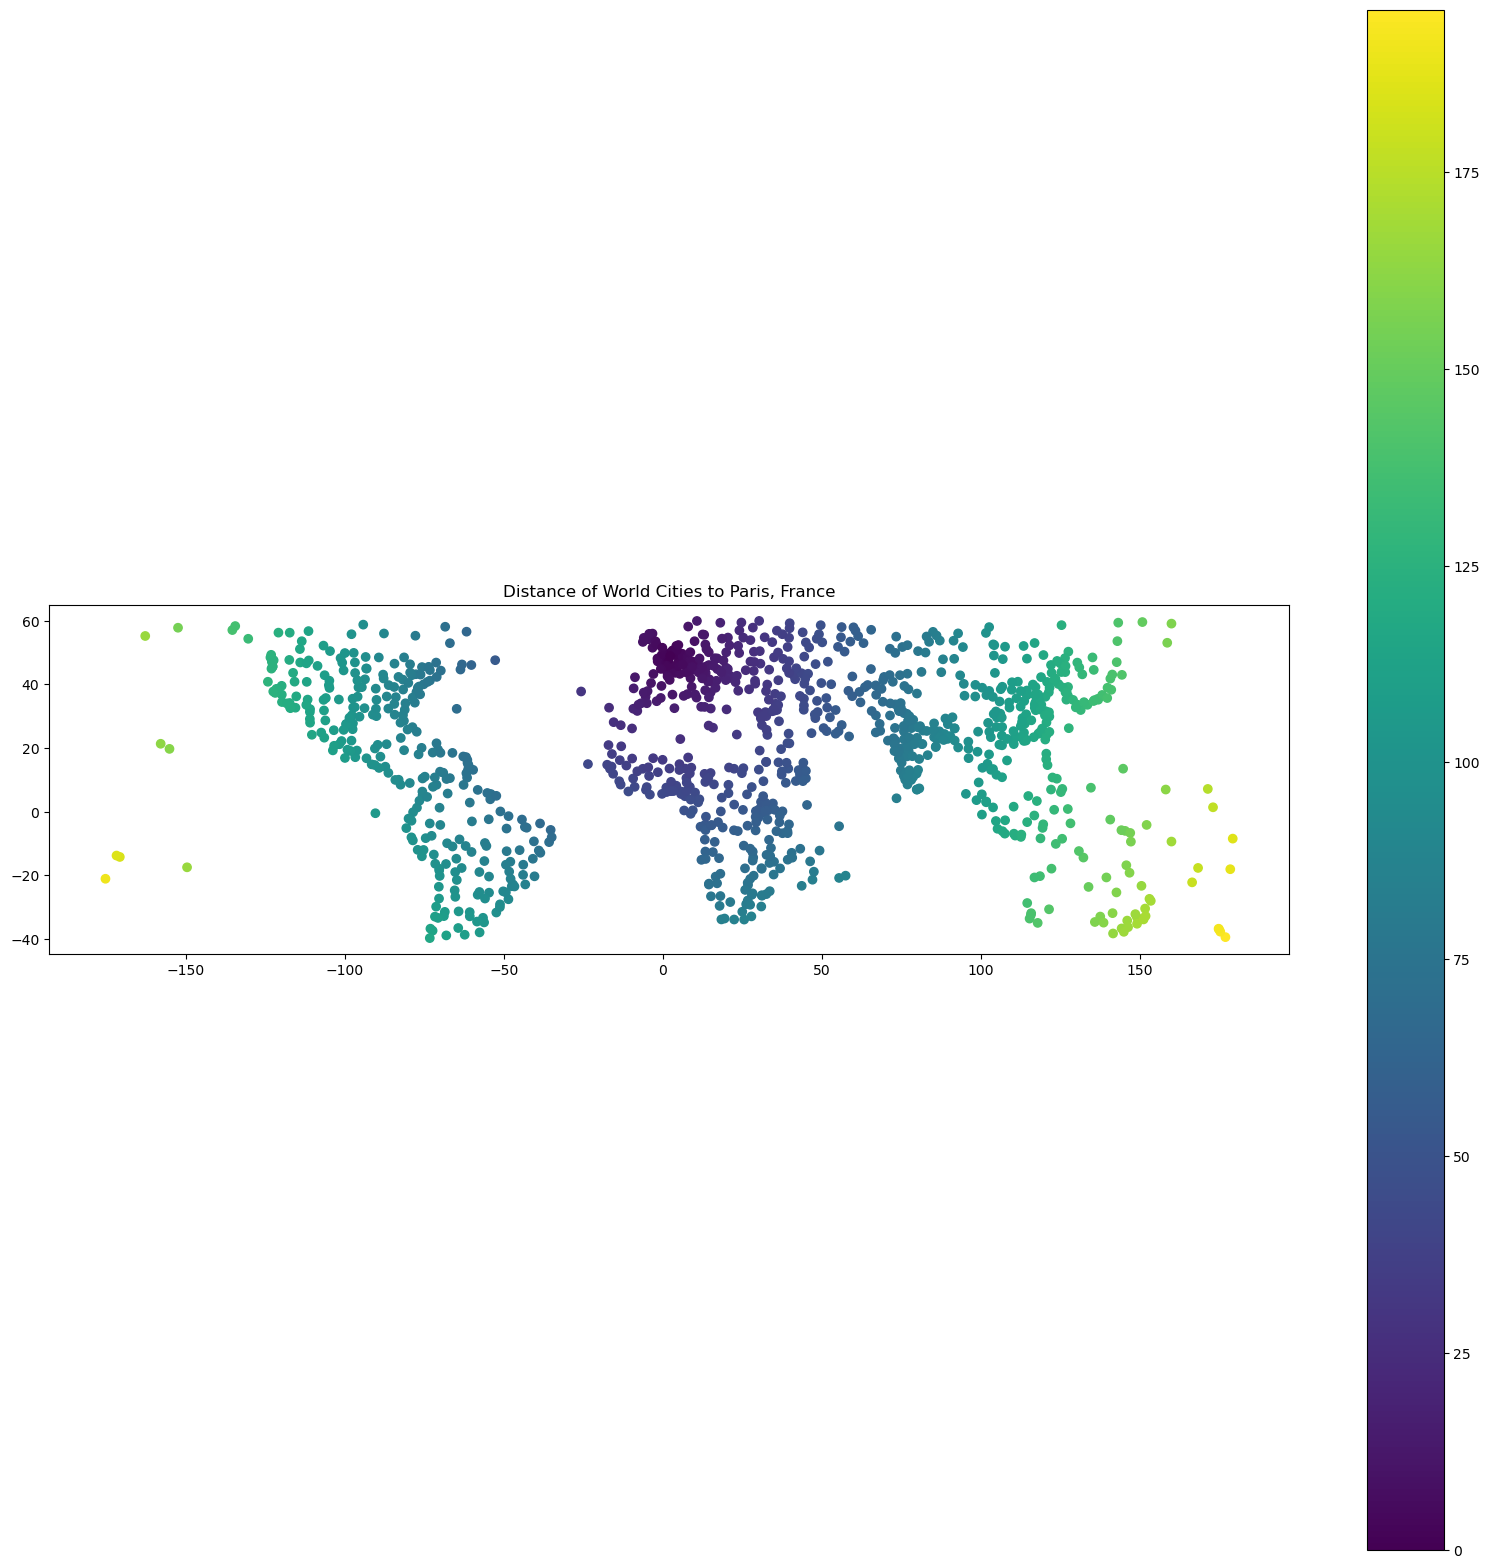

In [212]:
selected_cities_gdf.plot("distance_to_Paris", legend=True, figsize=(20, 20))
plt.title("Distance of World Cities to Paris, France")
plt.show()

## Submission Requirements

Complete the exercises above and and upload the notebook to your GitHub repository. Make sure the notebook has a Colab badge at the top so that it can be easily opened in Google Colab. Submit the URL of the notebook to Canvas.